## Shipping Data Analysis

### Importing dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('Shipping Data.csv')

In [6]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Getting data Info

In [7]:
data.info() # taking a look at info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
data.shape # looking at the shape of data

(10999, 12)

In [9]:
data.describe() # getting description of data

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Checking for the null values in the data

In [10]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<AxesSubplot:>

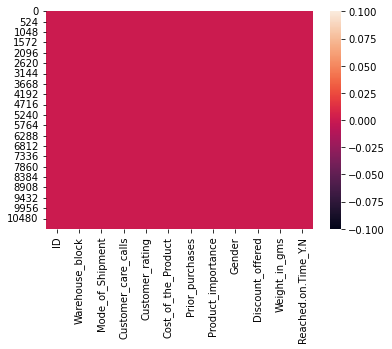

In [11]:
sns.heatmap(data.isnull())

### Droping unwanted columns from the dataset

In [12]:
data.drop(['ID'], axis=1, inplace=True)

In [13]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Checking for correlation between the coulmns

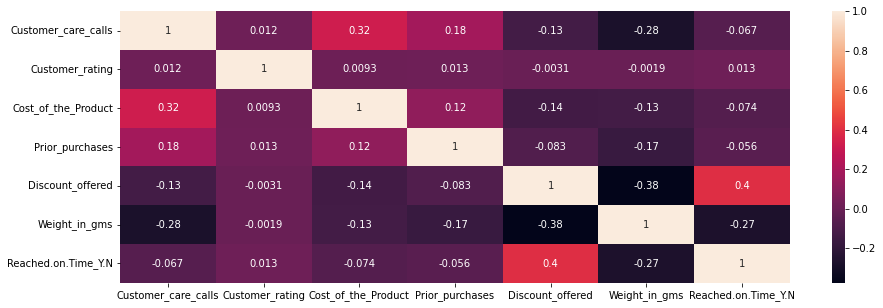

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Performing Exploratory Data Analysis

### check out the values for categorical columns

In [15]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


#### Creating categorical plots for all the columns

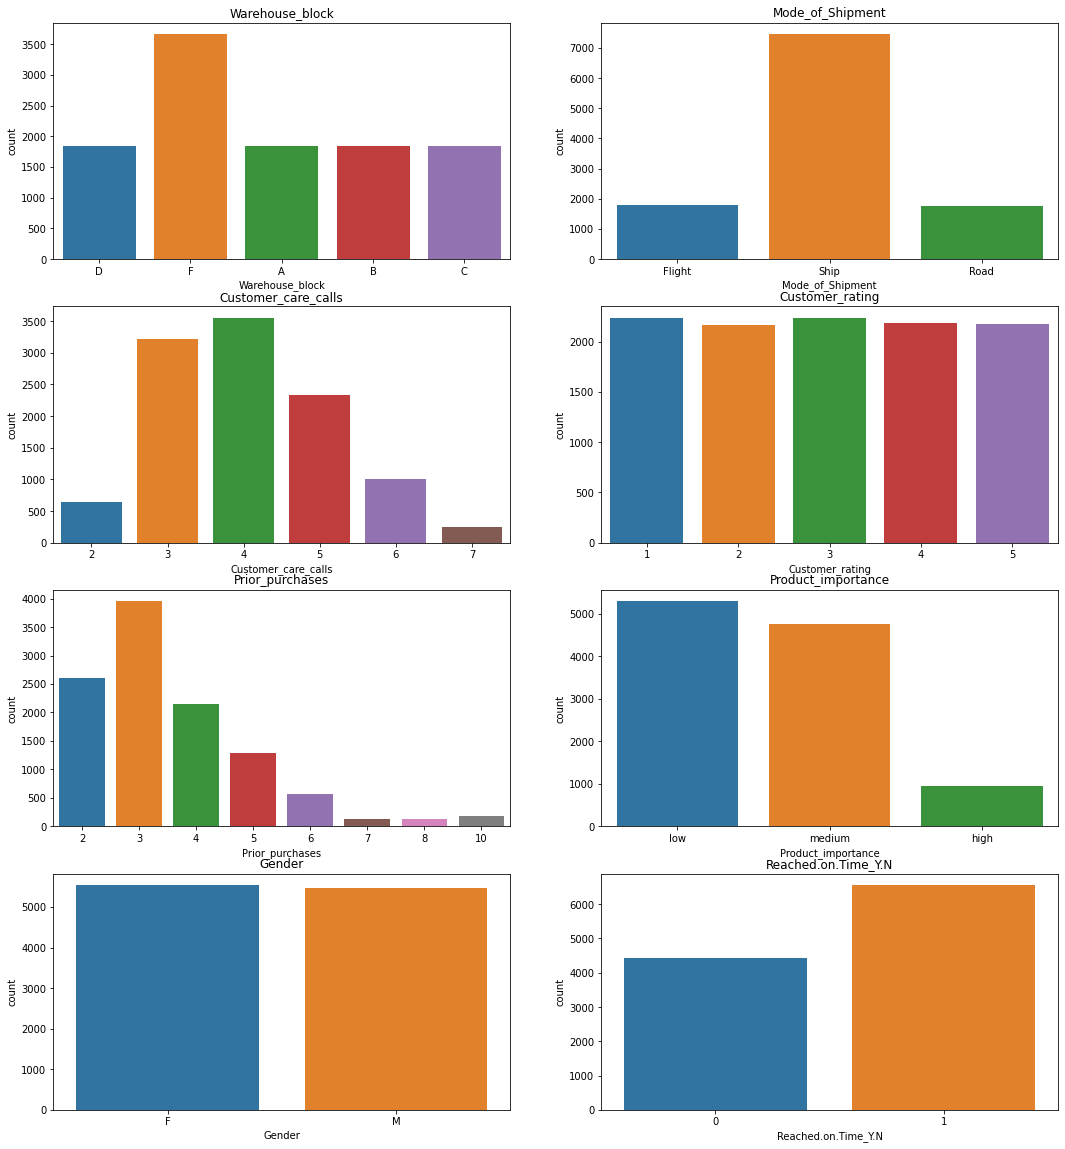

In [16]:
plt.figure(figsize=(18,20))

# creating a list of categorical coumns
col = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
plotn = 1

# plotting the countplot of each categorical column.
for i in range(len(col)):
    if plotn <= 8:
        a = plt.subplot(4,2, plotn)
        sns.countplot(x =col[i], data=data)
        plt.title(col[i])
    plotn += 1
plt.show()

### To check the Categorical values in the data

In [17]:
data.select_dtypes(include=['object'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


### Checking the Warehouse column with reached on time or not 

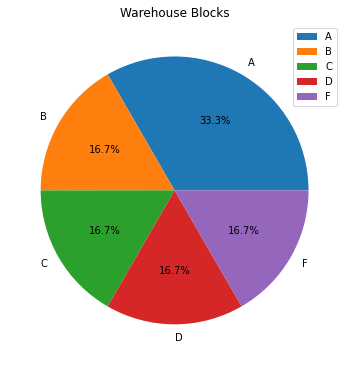

In [18]:
plt.figure(figsize=(6,8))
plt.pie(data['Warehouse_block'].value_counts(), autopct='%1.1f%%', labels=['A','B','C','D','F'])
plt.title('Warehouse Blocks')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

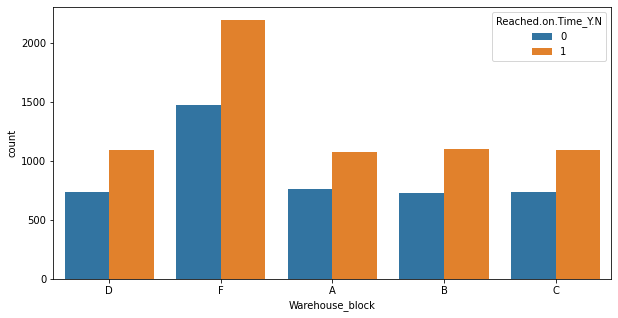

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = data['Warehouse_block'], hue=data['Reached.on.Time_Y.N'])

### Checking the relationship of gender column with reached on time

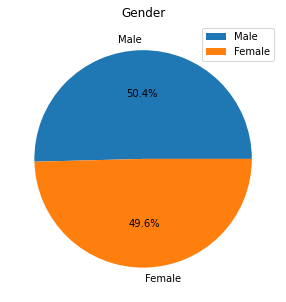

In [20]:
plt.figure(figsize=(10,5))
plt.pie(data['Gender'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Gender')
plt.legend()
plt.show()

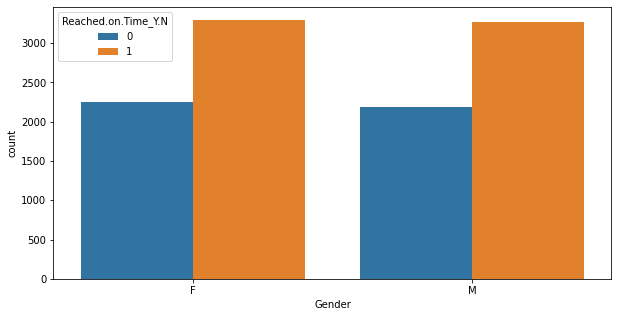

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = data['Gender'], hue=data['Reached.on.Time_Y.N'])
plt.show()

### Mode of Shippment with Reached on time

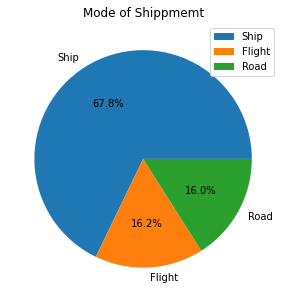

In [22]:
plt.figure(figsize=(10,5))
plt.pie(data['Mode_of_Shipment'].value_counts(), autopct='%1.1f%%', labels=['Ship','Flight','Road'])
plt.title('Mode of Shippmemt')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Mode of Shippment relation with Reached in time or not')

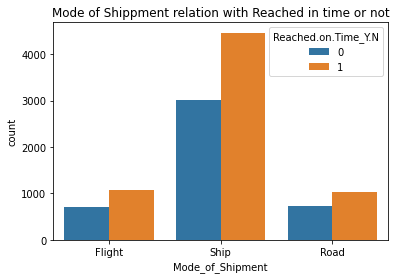

In [23]:
sns.countplot(x = data['Mode_of_Shipment'], hue=data['Reached.on.Time_Y.N'])
plt.title('Mode of Shippment relation with Reached in time or not')

### Product Importance with Reached on time

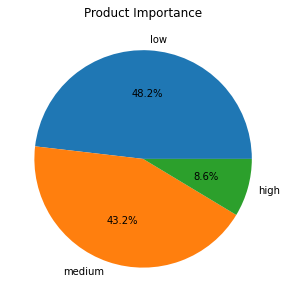

In [24]:
plt.figure(figsize=(10,5))
plt.pie(data['Product_importance'].value_counts(), autopct='%1.1f%%', labels=['low','medium','high'])
plt.title('Product Importance')
plt.show()

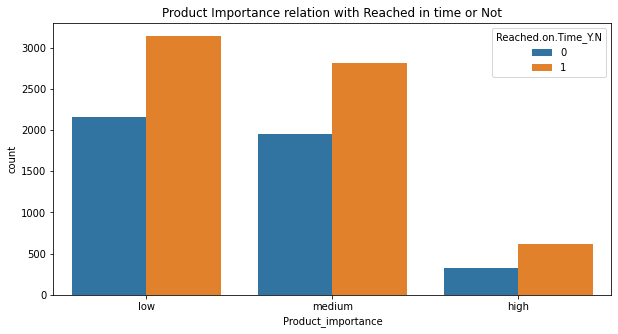

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Product_importance'], hue=data['Reached.on.Time_Y.N'])
plt.title('Product Importance relation with Reached in time or Not')
plt.show()

### Checking Relation of Continous values with Reached in time or Not

In [26]:
data.select_dtypes(include=['int64']) # to check the continues value columns in the dataset

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


### Plotting the Customer Care Calls

C:\Users\Vicky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


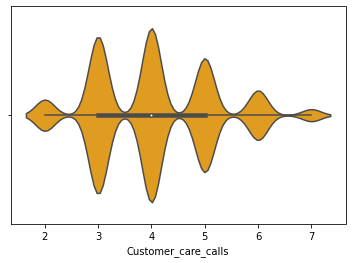

In [27]:
sns.violinplot(data['Customer_care_calls'], color='Orange')
plt.show()

### Distribution of Cost of Product in dataset

C:\Users\Vicky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


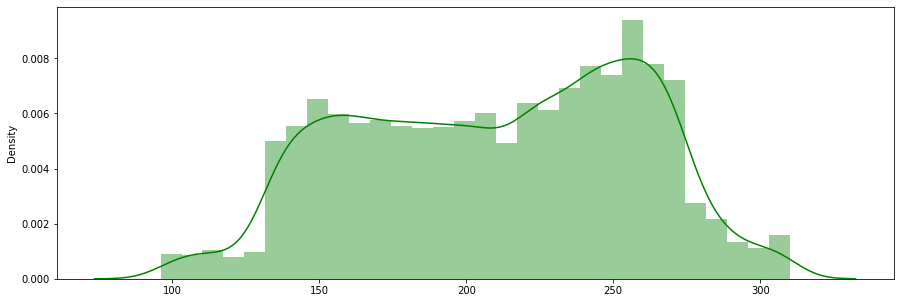

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(x=data['Cost_of_the_Product'], color='green')
plt.show()

### Relationship of Cost of Product where it reached on time or not

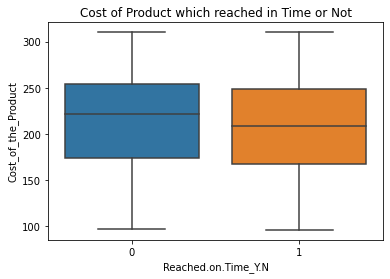

In [29]:
sns.boxplot(x=data['Reached.on.Time_Y.N'], y=data['Cost_of_the_Product'])
plt.title('Cost of Product which reached in Time or Not')
plt.show()

### Discount Offered

C:\Users\Vicky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


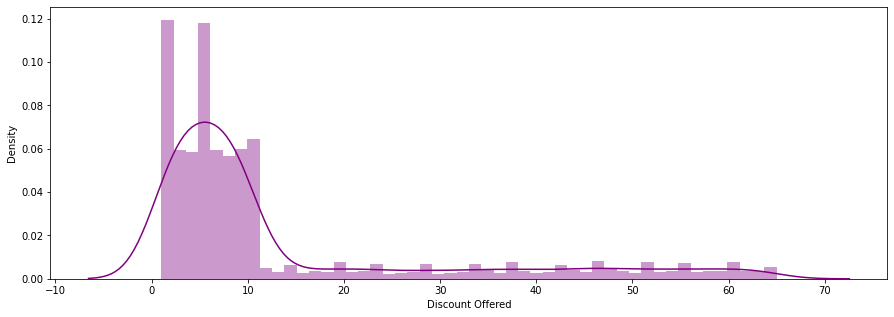

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(x=data['Discount_offered'], color='Purple')
plt.xlabel('Discount Offered')
plt.show()

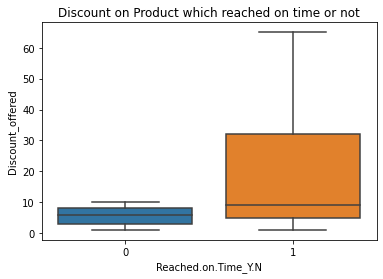

In [31]:
sns.boxplot(x=data['Reached.on.Time_Y.N'], y=data['Discount_offered'])
plt.title('Discount on Product which reached on time or not')
plt.show()

### Weight in Grams

C:\Users\Vicky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


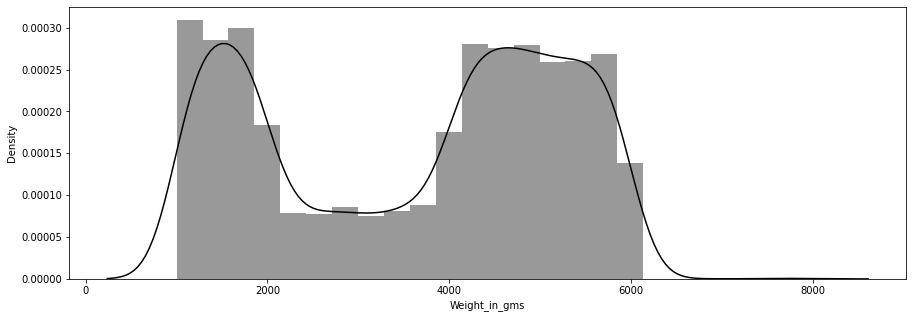

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(data['Weight_in_gms'], color='Black')
plt.show()

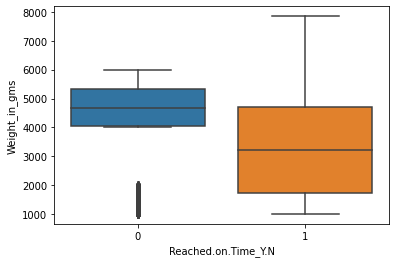

In [33]:
sns.boxplot(x=data['Reached.on.Time_Y.N'], y=data['Weight_in_gms'])
plt.show()

### Type of warehouse contains most weights 

In [34]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [35]:
data.groupby(['Warehouse_block'])['Weight_in_gms'].sum()

Warehouse_block
A     6627118
B     6664240
C     6674560
D     6655305
F    13349327
Name: Weight_in_gms, dtype: int64

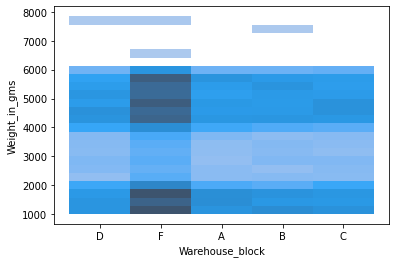

In [54]:
sns.histplot(x=data['Warehouse_block'], y=data['Weight_in_gms'])
plt.show()

### Which mode of shipmemnt carries most weights

In [37]:
data.groupby(['Mode_of_Shipment'])['Weight_in_gms'].sum()

Mode_of_Shipment
Flight     6449405
Road       6423209
Ship      27097936
Name: Weight_in_gms, dtype: int64

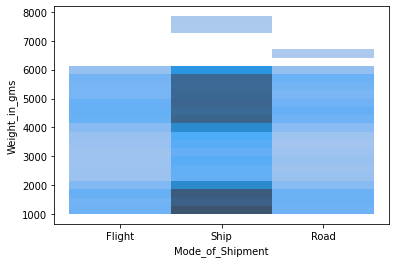

In [53]:
sns.histplot(x=data['Mode_of_Shipment'], y=data['Weight_in_gms'])
plt.show()

### Effect of Warehouse on Cost of Product

In [43]:
data.groupby(['Warehouse_block'])['Cost_of_the_Product'].sum().reset_index()

,Warehouse_block,Cost_of_the_Product
0,A,382671
1,B,388888
2,C,387114
3,D,386805
4,F,766477


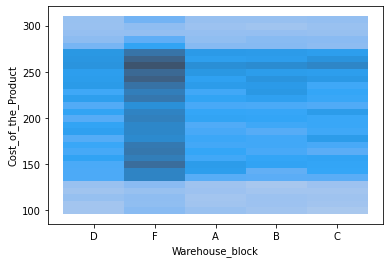

In [52]:
sns.histplot(x=data['Warehouse_block'], y=data['Cost_of_the_Product'])
plt.show()

### Does Mode of Shipment effect Cost of Product ?

In [47]:
data.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


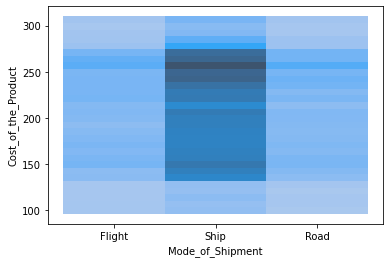

In [57]:
sns.histplot(x=data['Mode_of_Shipment'], y=data['Cost_of_the_Product'])
plt.show()

### Customer calls effect Ratings ?

In [61]:
data.groupby(['Customer_care_calls'])['Cost_of_the_Product'].sum()

Customer_care_calls
2    121149
3    639787
4    734154
5    498957
6    249683
7     68225
Name: Cost_of_the_Product, dtype: int64

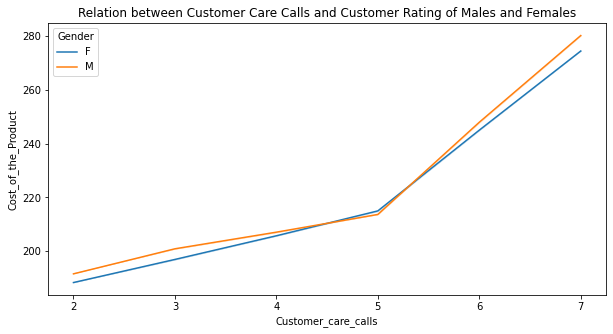

In [69]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['Customer_care_calls'], y=data['Cost_of_the_Product'], hue=data['Gender'], ci=0)
plt.title('Relation between Customer Care Calls and Customer Rating of Males and Females')
plt.show()

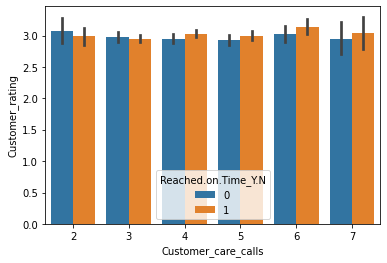

In [77]:
sns.barplot(x=data['Customer_care_calls'], y=data['Customer_rating'], hue=data['Reached.on.Time_Y.N'])
plt.show()

### Relation Between Customer Care Calls, Product importance and Prior Purchases

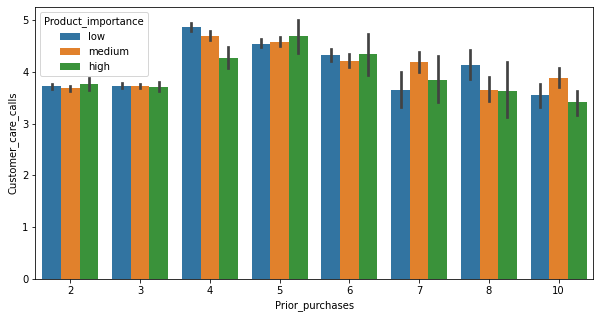

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['Prior_purchases'], y=data['Customer_care_calls'], hue=data['Product_importance'],)
plt.show()

### Relation between product importance, customer care calls and whether or not the product will reach on time or not

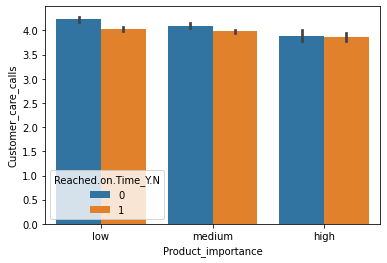

In [83]:
sns.barplot(x=data['Product_importance'], y=data['Customer_care_calls'], hue=data['Reached.on.Time_Y.N'])
plt.show()

### Relation Between Product Importance and Discount Offered

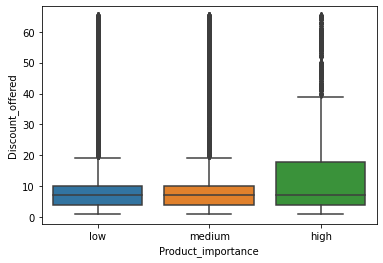

In [91]:
sns.boxplot(x=data['Product_importance'], y=data['Discount_offered'])
plt.show()

### Relation Between Gender, Prior_purchases and Reached on time or Not

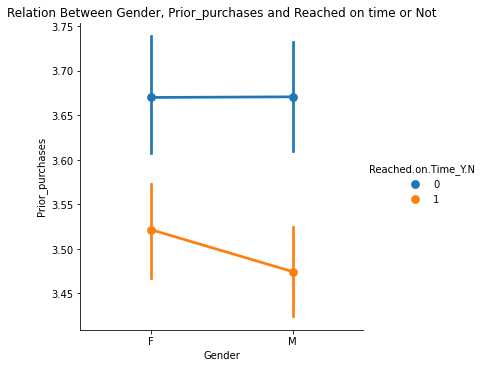

In [98]:
sns.catplot(x='Gender',y='Prior_purchases',hue='Reached.on.Time_Y.N', data=data,kind='point')
plt.title('Relation Between Gender, Prior_purchases and Reached on time or Not')
plt.show()

### Relation Prior_purchases and Discount Offered and reached on time or not

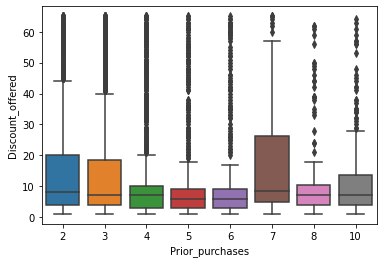

In [103]:
sns.boxplot(x=data['Prior_purchases'],y=data['Discount_offered'])
plt.show()

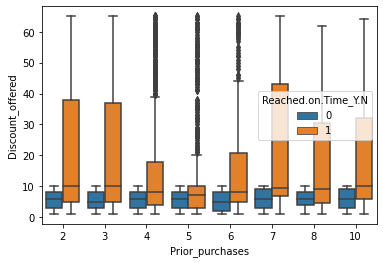

In [104]:
sns.boxplot(x=data['Prior_purchases'],y=data['Discount_offered'],hue=data['Reached.on.Time_Y.N'])
plt.show()

### Relation between customer care calls and weight of product

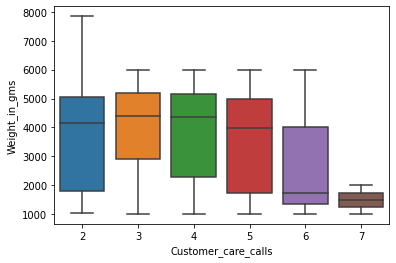

In [110]:
sns.boxplot(x=data['Customer_care_calls'],y=data['Weight_in_gms'])
plt.show()

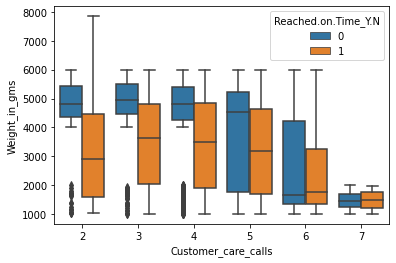

In [111]:
sns.boxplot(x=data['Customer_care_calls'],y=data['Weight_in_gms'],hue=data['Reached.on.Time_Y.N'])
plt.show()

### Does prior purchases effect cost of the products

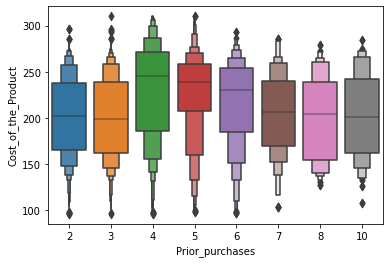

In [112]:
sns.boxenplot(x=data['Prior_purchases'], y=data['Cost_of_the_Product'])
plt.show()

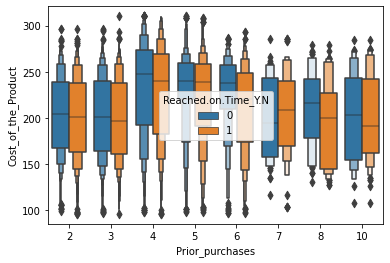

In [113]:
sns.boxenplot(x=data['Prior_purchases'], y=data['Cost_of_the_Product'], hue=data['Reached.on.Time_Y.N'])
plt.show()

### Relation between cost of the product and the discount offered and the relation with whether or not the product will reach on time

<AxesSubplot:xlabel='Discount_offered', ylabel='Cost_of_the_Product'>

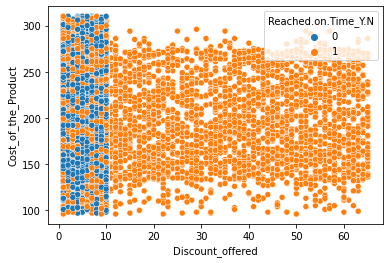

In [120]:
sns.scatterplot(x=data['Discount_offered'], y=data['Cost_of_the_Product'], hue=data['Reached.on.Time_Y.N'])